In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from datetime import datetime
from scipy.interpolate import interp1d
import math

In [3]:
Music_Data_Initial=pd.read_excel("Billboard R&B Annual 1942-2019.xlsx",sheet_name="1942-2019")

In [4]:
#Delete empty data
Music_Data_Useful=Music_Data_Initial[['Date Entered','Date Peaked','CH','CF','CT','PK','Title','Artist']]
Music_Data_Useful=Music_Data_Useful.dropna()

In [5]:
#Disassemble the data
EnteredTime=pd.to_datetime(Music_Data_Useful['Date Entered'],errors='coerce')
Music_Data_Useful['Year']=EnteredTime.dt.year
Music_Data_Useful['Month']=EnteredTime.dt.month
Music_Data_Useful['Day']=EnteredTime.dt.day
Music_Data_Useful['M&D']=(EnteredTime.dt.month-1)*30+EnteredTime.dt.day

In [6]:
Music_Data_Useful

,Date Entered,Date Peaked,CH,CF,CT,PK,Title,Artist,Year,Month,Day,M&D
0,1942-10-24 00:00:00,1942-11-07 00:00:00,22.0,22.0,22.0,3.0,Trav'lin' Light,Paul Whiteman & His Orchestra,1942.0,10.0,24.0,294.0
1,1942-11-14 00:00:00,1942-12-19 00:00:00,9.0,9.0,9.0,3.0,White Christmas,Bing Crosby,1942.0,11.0,14.0,314.0
2,1942-10-24 00:00:00,1942-11-28 00:00:00,17.0,17.0,17.0,2.0,When The Lights Go On Again (All Over The World),Lucky Millinder & His Orchestra,1942.0,10.0,24.0,294.0
3,1942-10-24 00:00:00,1942-10-31 00:00:00,14.0,14.0,14.0,2.0,Mr. Five By Five,Freddie Slack & His Orchestra,1942.0,10.0,24.0,294.0
4,1942-10-24 00:00:00,1942-11-14 00:00:00,14.0,14.0,14.0,1.0,Stormy Monday Blues,Earl Hines & His Orchestra,1942.0,10.0,24.0,294.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26523,2019-03-16 00:00:00,2019-03-16 00:00:00,1.0,0.0,0.0,1.0,Bad Girls,Lil Skies featuring Gucci Mane,2019.0,3.0,16.0,76.0
26524,2019-12-28 00:00:00,2019-12-28 00:00:00,1.0,0.0,0.0,1.0,Go In,Lil Tjay,2019.0,12.0,28.0,358.0
26525,2019-12-21 00:00:00,2019-12-21 00:00:00,1.0,0.0,0.0,1.0,Intro,Roddy Ricch,2019.0,12.0,21.0,351.0
26526,2019-08-24 00:00:00,2019-08-24 00:00:00,1.0,0.0,0.0,1.0,Nobody's Favorite,Rick Ross featuring Gunplay,2019.0,8.0,24.0,234.0


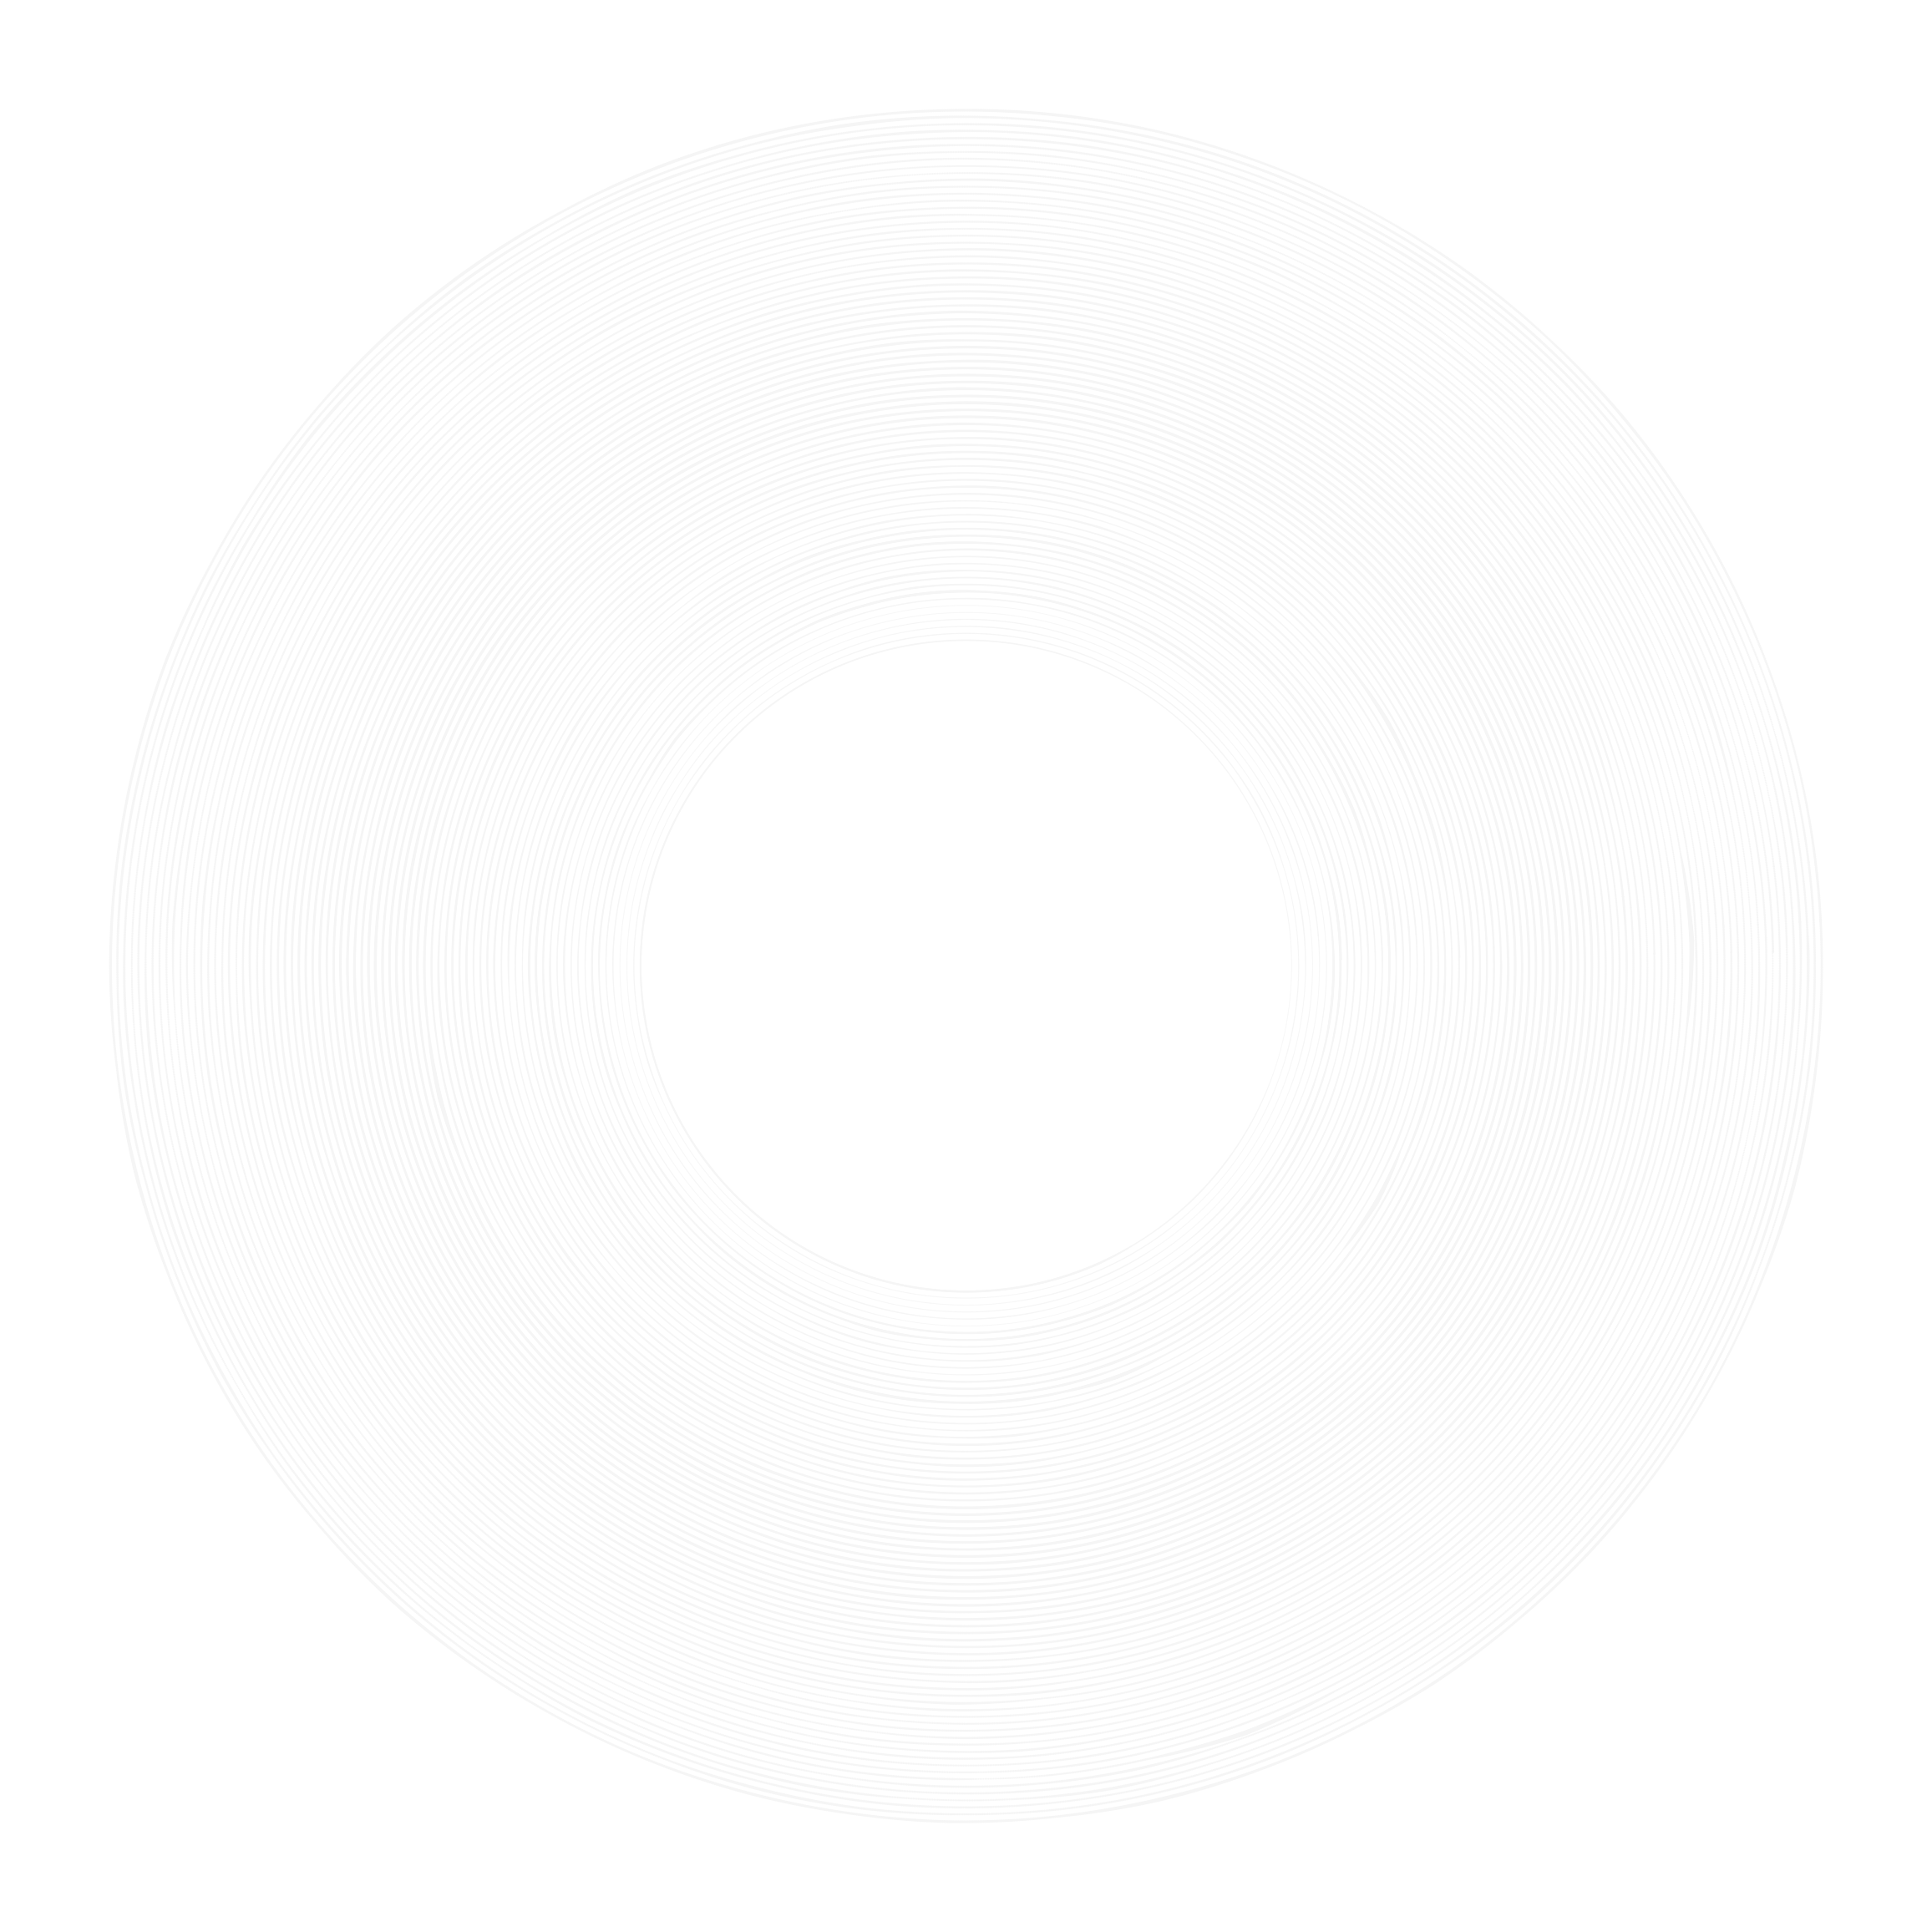

In [11]:
#Data visualization
plt.figure(dpi=1000)
for i in range(77): #Overall 77 years
    #Choose the data in the year of 1942+i
    OneYearData=Music_Data_Useful[Music_Data_Useful['Year']==1942+i]
    
    OneYearData_Day_Mount=OneYearData['M&D'].value_counts()
    
    OneYearData_Day_Mount=OneYearData_Day_Mount.sort_index()
    
    b=(OneYearData_Day_Mount.index.to_series()/57.29578).tolist()
    b.append(2*math.pi+b[0])
    b=np.array(b)
    
    c=[]
    d=(OneYearData_Day_Mount.index.to_series()).tolist()
    d=np.array(d)    
    for j in range(b.size-1):
        c.append(OneYearData[OneYearData['M&D']==d[j]]['CH'].sum())
    
    c=np.array(c)
    a=(c+i*1500+70000).tolist()
    #a=(OneYearData_Day_Mount+i*20+500).tolist()
    a.append(a[0])
    a=np.array(a)

    e=(OneYearData_Day_Mount).tolist()
    e.append(e[0])
    e=np.array(e)
    
    func_1=interp1d(b, a, kind = 'linear')
    b_smooth = np.linspace(b.min(),b.max(), 3000)
    a_smooth = func_1(b_smooth)
    
    func_2=interp1d(b, e, kind = 'linear')
    e_smooth = func_2(b_smooth)
    
    plt.subplot(121,polar=True)
    plt.scatter(b_smooth,a_smooth,c='whitesmoke',s=e_smooth/300+OneYearData_Day_Mount.sum()/30000,lw=0)
    #plt. bar(b,a/10, width=0.02, bottom=i*200+5000, alpha=0.5)
    plt.axis('off')

(0.19999999999999996, 6.8, 0.44999999999999996, 12.55)

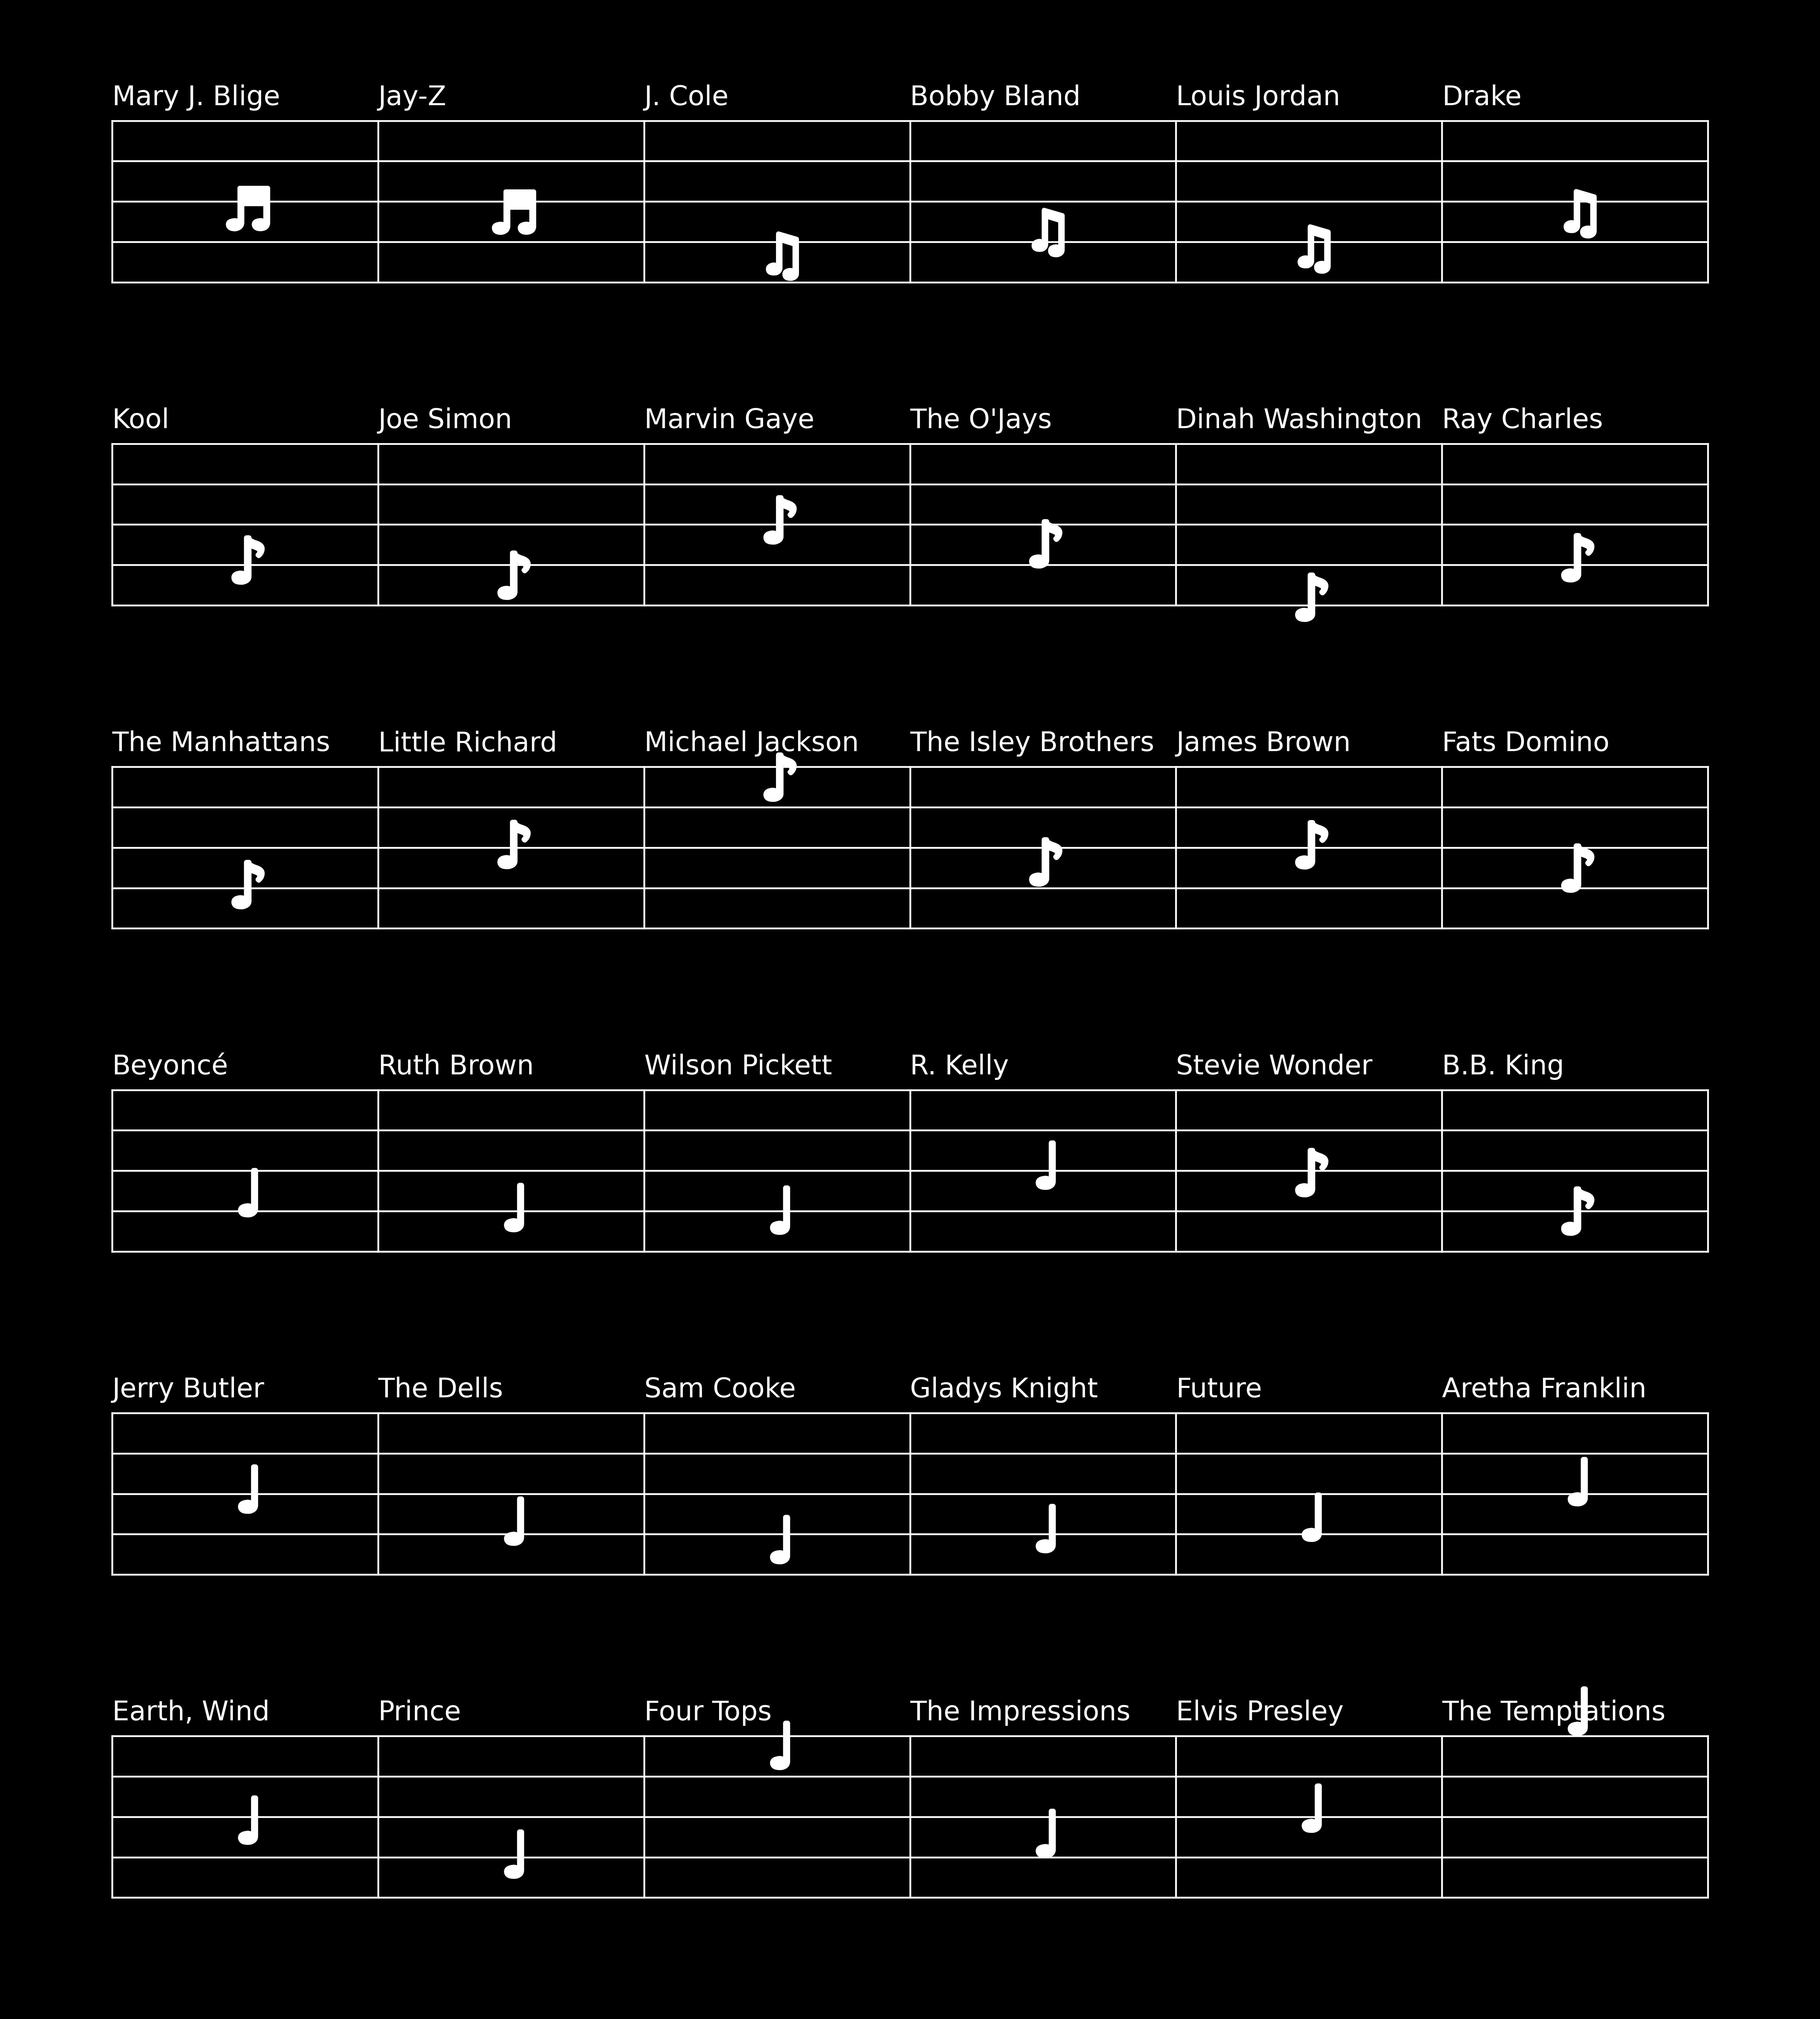

In [11]:
plt.figure(figsize=(7, 8),facecolor="k",dpi=1000)
for i in range(0,36):
    plt.scatter(Artist_X[i],Artist_Y[i],marker=Artist_Marker[i],c="w",s=100)

for i in range(0,6):
    plt.plot([0.5,0.5],[0*0.25+i*2+1,4*0.25+i*2+1],c="w",linewidth=0.4)
    plt.plot([1.5,1.5],[0*0.25+i*2+1,4*0.25+i*2+1],c="w",linewidth=0.4)
    plt.plot([2.5,2.5],[0*0.25+i*2+1,4*0.25+i*2+1],c="w",linewidth=0.4)
    plt.plot([3.5,3.5],[0*0.25+i*2+1,4*0.25+i*2+1],c="w",linewidth=0.4)
    plt.plot([4.5,4.5],[0*0.25+i*2+1,4*0.25+i*2+1],c="w",linewidth=0.4)
    plt.plot([5.5,5.5],[0*0.25+i*2+1,4*0.25+i*2+1],c="w",linewidth=0.4)
    plt.plot([6.5,6.5],[0*0.25+i*2+1,4*0.25+i*2+1],c="w",linewidth=0.4)

    for j in range(0,5):
        plt.plot([0.5,6.5],[j*0.25+i*2+1,j*0.25+i*2+1],c="w",linewidth=0.4)

for i in range(0,6):
    for j in range(0,6):
        plt.text(7-i-1.5,2*(7-j)-1.9,Artist_name[j+i*6].split("&")[0],c="w",fontsize=6)


plt.axis('off')